# PCA MODEL

In [1]:
#####Links Used:
#https://www.datacamp.com/community/tutorials/principal-component-analysis-in-python
#https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60
#https://www.datasklr.com/principal-component-analysis-and-factor-analysis/principal-component-analysis
#https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/
#https://stackoverflow.com/questions/39216897/plot-pca-loadings-and-loading-in-biplot-in-sklearn-like-rs-autoplot

##WHEN WE START TRAIN/TEST SPLIT REF.: https://stackabuse.com/implementing-pca-in-python-with-scikit-learn/

# LOADING DATA

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
initData = pd.read_csv("numeric_data_for_pca.csv")
initData.head()

,Unnamed: 0,maxLoad,stressMaxLoad,strainMaxLoad,energyAbsorp,youngsMod,ph,sec_Mn,sec_Mw,sec_polyDisp,sec_calcMass,sec_massRec
0,0,34.670,28.7790,0.051118,0.072340,2274.6,5.065,44.1,127.6,2.890,22.45,71.9
1,1,12.710,9.7289,0.030050,0.023396,1416.2,4.830,35.9,85.4,2.377,10.53,23.4
2,2,17.301,13.5850,0.034793,0.034683,2083.7,5.207,20.1,93.4,4.653,20.54,65.8
3,3,25.879,21.3200,0.044734,0.057662,2015.6,5.165,29.5,91.2,3.094,6.84,21.9
4,4,14.901,16.1320,0.047622,0.036076,1798.6,6.405,76.8,161.6,2.105,7.92,25.4


In [4]:
initData = initData.drop(columns = ['youngsMod','Unnamed: 0', 'sec_calcMass', 'sec_massRec'])

In [5]:
initData = initData.dropna()
initData.shape

(957, 8)

# BUILDING PCA MODEL

In [6]:
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

pca = PCA(n_components=3)

In [7]:
initData_columnNames= initData.columns
initData_columnNames

Index(['maxLoad', 'stressMaxLoad', 'strainMaxLoad', 'energyAbsorp', 'ph',
       'sec_Mn', 'sec_Mw', 'sec_polyDisp'],
      dtype='object')

In [8]:
pipeline = Pipeline([
    ('scaling', StandardScaler()), ('normalize', Normalizer())  
])

In [9]:
scaleNormPipe = pipeline.fit_transform(initData)

In [10]:
pca_df = pd.DataFrame(data = scaleNormPipe, columns = initData_columnNames)
pca_df.head()

,maxLoad,stressMaxLoad,strainMaxLoad,energyAbsorp,ph,sec_Mn,sec_Mw,sec_polyDisp
0,0.344133,0.309853,0.493316,0.248452,0.081187,0.599406,0.329995,-0.075490
1,-0.586798,-0.595164,-0.295077,-0.398325,-0.060376,0.129665,-0.038202,-0.183841
2,-0.485324,-0.503530,-0.189311,-0.314023,0.127619,-0.324789,0.005652,0.504641
3,-0.514608,-0.551532,0.476097,-0.086910,0.406624,-0.165529,-0.030627,0.055579
4,-0.318846,-0.210270,0.117272,-0.161887,0.411529,0.751004,0.233589,-0.161980


## TRAIN, TEST SPLIT

In [11]:
from sklearn.model_selection import train_test_split
# "target" contains the column name of the classification labels
target = "sec_Mw"

X = pca_df.drop(target,1)
y = pca_df[target]

seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [12]:
y

0      0.329995
1     -0.038202
2      0.005652
3     -0.030627
4      0.233589
         ...   
952   -0.080537
953    0.142196
954   -0.370792
955   -0.027026
956    0.113625
Name: sec_Mw, Length: 957, dtype: float64

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score

# Train, test splits
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, 
                                                    stratify=y, 
                                                    random_state=42)

# Decision trees with depth = 2
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)
preds = clf.predict_proba(X_test)
print('Accuracy: {:.5f}'.format(accuracy_score(y_test, 
                                                preds.argmax(axis=1))))

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.

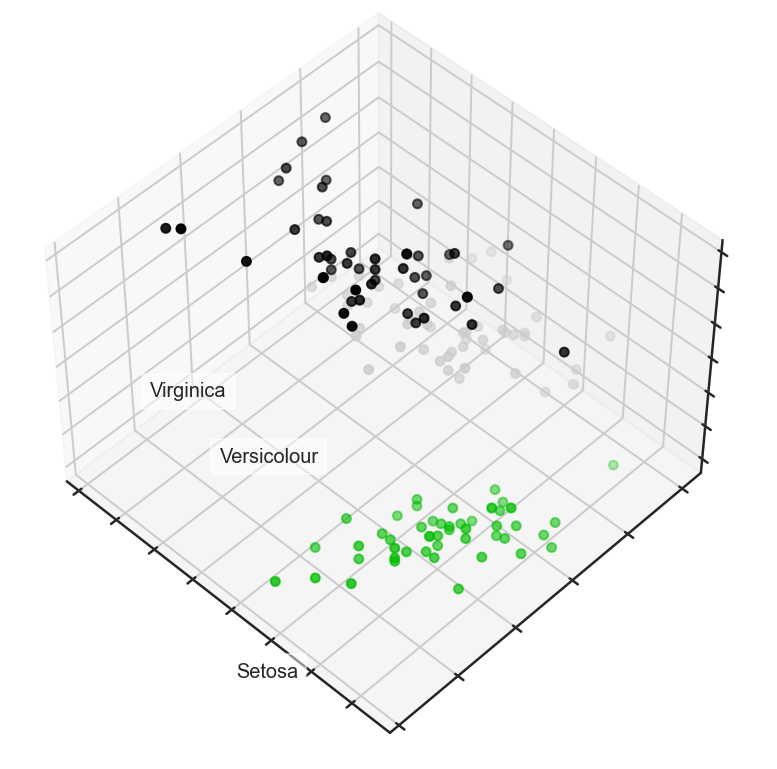

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='white')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
from sklearn import decomposition
from sklearn import datasets
from mpl_toolkits.mplot3d import Axes3D

# Loading the dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Let's create a beautiful 3d-plot
fig = plt.figure(1, figsize=(6, 5))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()

for name, label in [('Setosa', 0), ('Versicolour', 1), ('Virginica', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Change the order of labels, so that they match
y_clr = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y_clr, 
           cmap=plt.cm.nipy_spectral)

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([]);

In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
pca_train = pipeline.fit_transform(X_train)
pca_test = pipeline.transform(X_test)

In [ ]:
pca_train = pca.fit_transform(pca_train)
pca_test = pca.transform(pca_test)

In [ ]:
explained_variance = pca.explained_variance_ratio_
explained_variance

In [ ]:
pca_train_df = pd.DataFrame(data = pca_train, columns = ['PC1', 'PC2', 'PC3'])
pca_test_df = pd.DataFrame(data = pca_test, columns = ['PC1', 'PC2','PC3'])


In [ ]:
target = pd.Series(y_train, name='sec_Mw')
result_df_train = pd.concat([pca_train_df, target], axis=1)

In [ ]:
result_df_train.head()

In [ ]:
result_df_test = pd.concat([pca_test_df, y], axis=1)

## SCATTER PLOT

In [ ]:
fig = plt.figure(figsize = (12,10))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('First Principal Component ', fontsize = 15)
ax.set_ylabel('Second Principal Component ', fontsize = 15)
ax.set_title('Principal Component Analysis (2PCs) for Iris Dataset', fontsize = 20)

targets = [0, 1, 2]
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    print(target)
    indicesToKeep = pca_df['sec_Mw'] == target
    ax.scatter(result_df_train.loc[indicesToKeep, 'PC1'], 
               result_df_train.loc[indicesToKeep, 'PC2'], 
               c = color, 
               s = 50)
ax.legend(targets)
ax.grid()

In [ ]:
result_df_train

In [ ]:
plt.scatter(pca.components_[0], pca.components_[1], alpha=.1, color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [ ]:
plt.scatter(pca.components_[1], pca.components_[2], alpha=.1, color='black')
plt.xlabel('PCA 2')
plt.ylabel('PCA 3')

In [ ]:
def labelled_scatterplot(data=None,x=None,y=None): #,labs=None
    p1 = sns.scatterplot(data=data,x=x,y=y)
    for line in range(0,data.shape[0]):
        p1.text(data[x][line]+0.01, data[y][line], 
                #data[labs][line], horizontalalignment='left', 
                size='medium', color='black')

In [ ]:
labelled_scatterplot(data=pca_train_df, x='PC 1',y='PC 2')

# Scree code

In [16]:
screePipe = pipeline.fit_transform(initData)
scree_pca = PCA(n_components=5)

In [17]:
screeFitTransf=scree_pca.fit_transform(screePipe)

In [18]:
screeFitTransf

array([[ 1.03445058,  0.42490242,  0.21586241, -0.11941636, -0.09522619],
       [-0.71444016,  0.41819651,  0.36798835,  0.01598079, -0.02749345],
       [-0.55083569, -0.34694441,  0.67350566,  0.15653194,  0.0279979 ],
       ...,
       [ 0.32481791, -0.4514854 , -0.28687773,  0.45166493,  0.27376034],
       [ 0.95699484, -0.13562276,  0.06153755,  0.53654931,  0.16496083],
       [ 0.6652948 , -0.72419626,  0.39375504,  0.29369962, -0.10958437]])

In [19]:
scree_df = pd.DataFrame(data = screeFitTransf, columns = ['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5'])

In [20]:
scree_df.head()

,PC 1,PC 2,PC 3,PC 4,PC 5
0,1.034451,0.424902,0.215862,-0.119416,-0.095226
1,-0.714440,0.418197,0.367988,0.015981,-0.027493
2,-0.550836,-0.346944,0.673506,0.156532,0.027998
3,-0.172342,0.148634,0.532795,0.652069,0.028133
4,0.200338,0.810731,0.663130,0.066950,0.167931


## SCREE PLOT

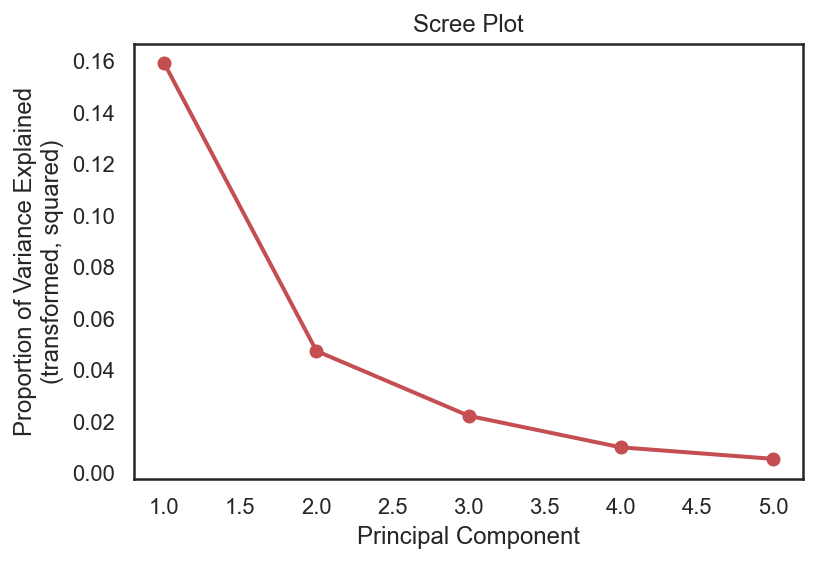

In [21]:
import matplotlib.pyplot as plt

scree_PC_Values = np.arange(scree_pca.n_components_) + 1
plt.plot(scree_PC_Values, np.square(scree_pca.explained_variance_ratio_), 'ro-', linewidth=2)
###We transformed the scree plot by squaring the variance explained to make the "ideal" PC more apparent
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Proportion of Variance Explained\n(transformed, squared)')
plt.show()